In [52]:
import pickle
import math
import csv
import collections

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.legend_handler as lh
from matplotlib.legend_handler import HandlerPathCollection

import numpy as np
from scipy.stats import gaussian_kde
import Bio.ExPASy.Prosite as BEP

#from bokeh.plotting import figure, show, output_file, vplot
#from bokeh.io import output_notebook
#from bokeh.models import ColumnDataSource

from ipywidgets import interact
import ipywidgets as widgets

%matplotlib inline
#output_notebook()

In [16]:
plt.rc('mathtext', fontset='cm')

In [2]:
with file('./output/alpha_per_pattern.pickle', 'rb') as fi:
    filtered_scores = pickle.load(fi)

In [53]:
pattern_to_name = collections.defaultdict(list)

with file('/Users/maurits/Downloads/prosite.dat', 'r') as fi:
    for record in BEP.parse(fi):
        name = record.accession
        pattern = record.pattern.rstrip('.')
        if len(pattern):
            pattern_to_name[pattern].append(name)

In [56]:
with open('./output/alpha_per_pattern.csv', 'w') as fo:
    writer = csv.DictWriter(fo, fieldnames=['accession', 'pattern', 'fraction', 'score'])
    writer.writeheader()
    for pat, fraction, m_count, n_count, score, _ in sorted(filtered_scores, key=lambda x: x[1]):
        row = {'accession': pattern_to_name[pat][0], 'pattern': pat, 'fraction': fraction, 'score': score}
        writer.writerow(row)

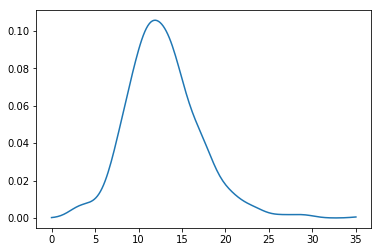

In [3]:
ys = []
for pat, fraction, m_count, n_count, score in sorted(filtered_scores, key=lambda x: x[1]):
    pat_len = len(pat.split("-"))

    ys.append(pat_len)

pdf = gaussian_kde(ys)
xs = np.linspace(0, 35, 200)
ys = pdf(xs)

plt.plot(xs, ys)
plt.show()

C-x-C-x(2)-{V}-x(2)-G-{C}-x-C PS00022
[GSTALIVN]-{PCHR}-{KND}-H-E-[LIVMFYW]-{DEHRKP}-H-{EKPC}-[LIVMFYWGSPQ] PS00142
G-[GA]-x-[STN]-x-H-[STA]-[STAV]-[LIVM](2)-[STAV]-[RG] PS00370
[GSTADE]-[KREQSTIV]-x-{EPRK}-{VPGL}-x-[KRDN]-S-[LIVMF](2)-{EVPL}-[LIVM]-{EATN}-x-[LIVM]-[GADE] PS00589
C-x-C-x(2)-[GP]-[FYW]-x(4,8)-C PS01186
D-{W}-[DNS]-{ILVFYW}-[DENSTG]-[DNQGHRK]-{GP}-[LIVMC]-[DENQSTAGC]-x(2)-[DE]-[LIVMFYW] PS00018


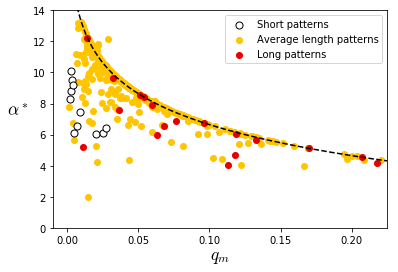

In [55]:
xs_small = []
ys_small = []

xs_medium = []
ys_medium = []

xs_large = []
ys_large = []

for pat, fraction, m_count, n_count, score, _ in sorted(filtered_scores, key=lambda x: x[1]):
    if m_count + n_count < 0:
        continue
    
    pat_len = len(pat.split("-"))
    
    if pat_len <= 5:
        xs_small.append(fraction)
        ys_small.append(score)
    elif pat_len <= 20:
        xs_medium.append(fraction)
        ys_medium.append(score)
    else:
        xs_large.append(fraction)
        ys_large.append(score)
    
    # 2 * 2log (q_m / q_m^2)
    if score > 2*math.log(fraction / fraction**2, 2):
        print pat, pattern_to_name[pat][0]

#norm = colors.LogNorm()
#norm.autoscale_None(cs)
#scaled_cs = [cm.hot(c) for c in norm(cs)]
#plt.scatter(xs, ys, c=scaled_cs, s=30)

scatter1 = plt.scatter(xs_medium, ys_medium, c=cm.hot(0.66), s=50, marker="o", linewidths=0.0, label="Average length patterns")
scatter2 = plt.scatter(xs_small, ys_small, c=cm.hot(1.0), s=50, marker="o", edgecolors='black', label="Short patterns")
scatter3 = plt.scatter(xs_large, ys_large, c=cm.hot(0.33), s=50, marker="o", linewidths=0.0, label="Long patterns")

handler_map = {x: HandlerPathCollection(numpoints=1) for x in {scatter1, scatter2, scatter3}}

env_xs = np.linspace(0.001, 0.3, 1000)
env_ys = 2 * np.log2(env_xs / env_xs**2)

plt.plot(env_xs, env_ys, ls='dashed', color='black')
plt.ylim(0, 14)
plt.xlim(-0.01, 0.225)
plt.xlabel("$q_m$", fontsize='xx-large', labelpad=2)
plt.ylabel(r"$\alpha^*$", fontsize='xx-large', rotation='horizontal', horizontalalignment='right')
plt.legend(handles=[scatter2, scatter1, scatter3], handler_map=handler_map)
plt.savefig("alpha_vs_qm.pdf")

In [ ]:
xs = []
ys = []
cs = []
for pat, fraction, m_count, n_count, score in sorted(filtered_scores, key=lambda x: x[1]):
    if m_count + n_count < 1000:
        continue
        
    xs.append(len(pat.split("-")))
    ys.append(fraction)
    cs.append(score)

norm = colors.Normalize()
norm.autoscale_None(cs)
scaled_cs = [cm.hot(c) for c in norm(cs)]
    
plt.scatter(xs, ys, c=scaled_cs)
plt.show()

In [ ]:
for pat, fraction, m_count, n_count, score in sorted(filtered_scores, key=lambda x: x[2] + x[3], reverse=True):
    total_count = m_count + n_count
    pat_len = len(pat.split('-'))
    
    if pat_len <= 100:
        print "{0}\t{1}".format(total_count, pat)

In [ ]:
def update(thresh):
    xs_small = []
    ys_small = []

    xs_medium = []
    ys_medium = []

    xs_large = []
    ys_large = []

    for pat, fraction, m_count, n_count, score in sorted(filtered_scores, key=lambda x: x[1]):
        if m_count + n_count < thresh:
            continue

        pat_len = len(pat.split("-"))

        if pat_len <= 5:
            xs_small.append(fraction)
            ys_small.append(score)
        elif pat_len <= 20:
            xs_medium.append(fraction)
            ys_medium.append(score)
        else:
            xs_large.append(fraction)
            ys_large.append(score)
        
    
    src_small.data['x'] = xs_small
    src_small.data['y'] = ys_small

    src_medium.data['x'] = xs_medium
    src_medium.data['y'] = ys_medium
    
    src_large.data['x'] = xs_large
    src_large.data['y'] = ys_large
    
    src_small.push_notebook()
    src_medium.push_notebook()
    src_large.push_notebook()

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

src_small = ColumnDataSource(data={'x': xs_small, 'y': ys_small})
src_medium = ColumnDataSource(data={'x': xs_medium, 'y': ys_medium})
src_large = ColumnDataSource(data={'x': xs_large, 'y': ys_large})

p = figure(title="Alpha for all motif patterns", tools=TOOLS)
p.circle(xs_small, ys_small, legend="Low complexity", color="orange", source=src_small)
p.circle(xs_medium, ys_medium, legend="Medium complexity", color="green", source=src_medium)
p.circle(xs_large, ys_large, legend="High complexity", color="blue", source=src_large)

show(p)

In [ ]:
interact(update, thresh=widgets.IntSlider(min=0,max=10000,step=100,value=0))